REGRESION LINEAR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

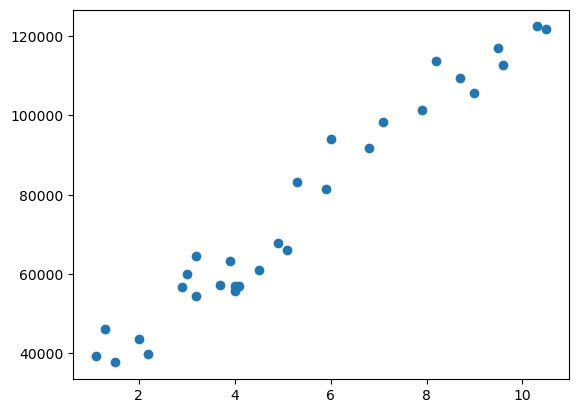

In [3]:
dataset=pd.read_csv("Salary_Data.csv")
X = dataset.iloc[:,:1].values
y = dataset.iloc[:,1].values
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state=0)

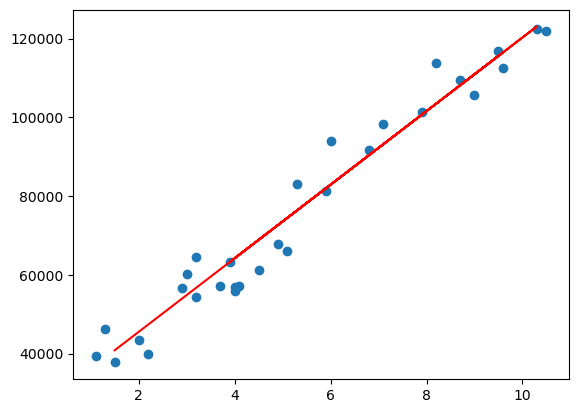

In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
plt.scatter(X,y)
plt.plot(X_test,y_pred,'r')

In [7]:
print("Coeficiente M*X= ",regressor.coef_)
print("Coeficiente de intercepcion con y= ", regressor.intercept_)

Coeficiente M*X=  [9345.94244312]
Coeficiente de intercepcion con y=  26816.19224403119


REGRESION MULTIVARIABLE

In [8]:
dataset2 = pd.read_csv('50_Startups.csv')
dataset2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
X2= dataset2.iloc[:,:-1].values
y2= dataset2.iloc[:,4].values

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X2=LabelEncoder()
X2[:,3]=labelencoder_X2.fit_transform(X2[:,3])
onehotencoder=OneHotEncoder()
X2=onehotencoder.fit_transform(X2).toarray()

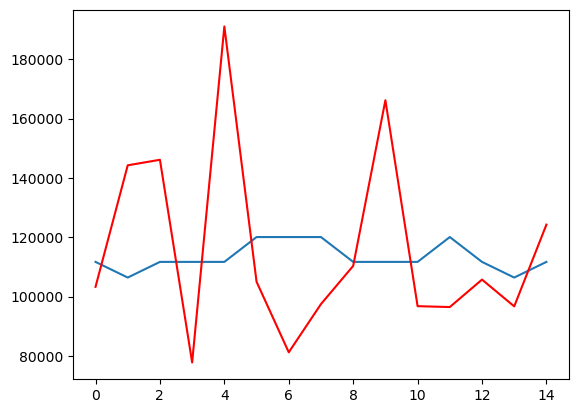

In [28]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
regressor2=LinearRegression()
regressor2.fit(X2_train,y2_train)
y2_pred=regressor2.predict(X2_test)
#La linea siguiente me manda el error siguiente
#invalid syntax. Perhaps you forgot a comma?
#y2_pred=regressor2.predict([[1 0 0 100000 200000 150000]])
plt.plot(y2_pred)
plt.plot(y2_test,'r')

DECISION TREE REGRESSION

In [32]:
datasetTree=pd.read_csv('Position_Salaries.csv')
XT=datasetTree.iloc[:,1:2].values
yT=datasetTree.iloc[:,2].values
datasetTree.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [33]:
from sklearn.tree import DecisionTreeRegressor
regressorTree=DecisionTreeRegressor(random_state=0)

regressorTree.fit(XT,yT)
yT_pred=regressorTree.predict([[5.9]])
print(yT_pred)

[150000.]


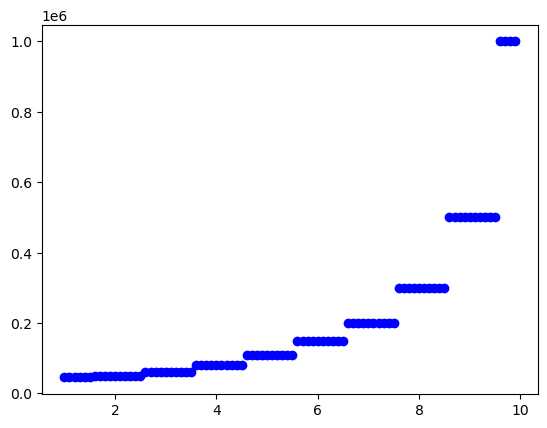

In [35]:
xT_grid=np.arange(min(XT),max(XT),0.1)
xT_grid=xT_grid.reshape((len(xT_grid),1))
plt.scatter(xT_grid, regressorTree.predict(xT_grid), color='blue')
plt.show()